In [ ]:
import pandas as pd
import io
from google.colab import files
myfile = files.upload() 

In [ ]:
df=pd.read_csv(io.BytesIO(myfile['important6.csv']), encoding='utf-8')

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null 
 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm 
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font = fm.FontProperties(fname=fontpath, size=10) 
fm._rebuild()
99
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='NanumBarunGothic')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51656 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49548 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49328 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54868 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47932 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 51656 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 49548 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

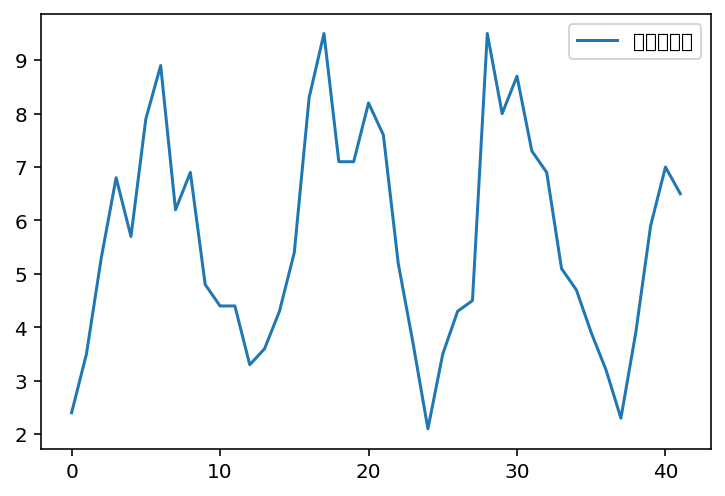

In [ ]:
from matplotlib import pyplot
df.plot()
pyplot.show()

In [ ]:
# 컬럼명 변경
df.columns = ['ds', 'y']

# 데이터 타입 변경
df['ds']= pd.to_datetime(df['ds'])

# 모델 생성
from fbprophet import Prophet
model = Prophet()

# 모델 학습
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
last_year = list()

for i in range(21, 23):
  for j in range(1, 13):
    last_year.append(['20%d-%02d' % (i, j)])

last_year = pd.DataFrame(last_year, columns = ['ds'])
last_year['ds']= pd.to_datetime(last_year['ds'])

In [ ]:
forecast = model.predict(last_year)

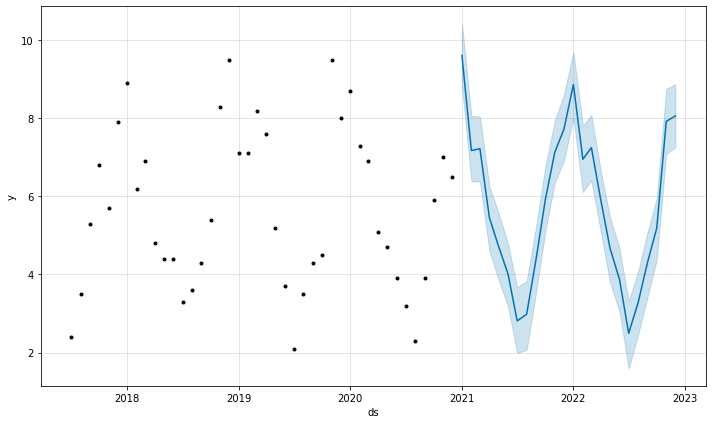

In [ ]:
model.plot(forecast)
pyplot.show()